In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict
%matplotlib inline

In [2]:
#G=nx.read_edgelist('bio-celegans.txt', nodetype=int)
N = 5000
p = 0.08
G = nx.erdos_renyi_graph(N, p)

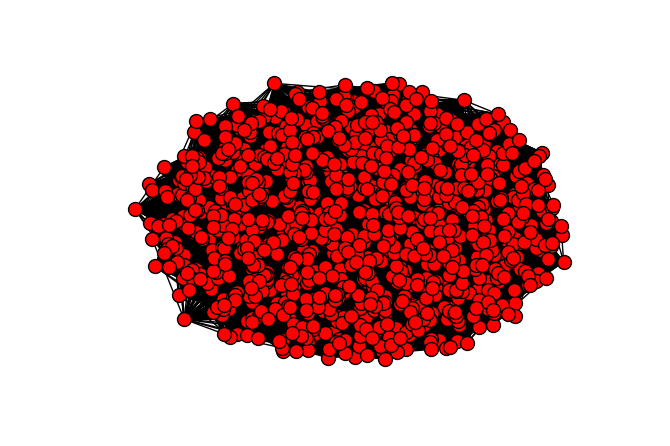

In [11]:
pos=nx.spring_layout(G,iterations=100)
nx.draw(G,pos,node_size=100)#,with_labels=True)

In [3]:
nodeNumber = nx.number_of_nodes(G)
print("Соседи вершины 1: ", *nx.all_neighbors(G, 1))
print("Общее количество вершин: ", nodeNumber)

Соседи вершины 1:  3 4101 2055 12 1039 1042 4115 3095 1050 4979 29 1055 3105 4132 4133 2091 2092 1069 46 2397 3126 4151 3128 1082 2110 2113 72 4171 79 4176 82 84 85 3160 4186 91 2142 4965 2145 3173 1126 4199 3179 2159 112 2162 4982 3191 4216 2172 1743 3201 2178 1158 2289 2188 1730 2413 4240 4301 2196 2197 1175 153 1182 1183 4472 3237 881 2217 173 1198 2226 1203 1204 192 193 196 1398 198 3274 205 2253 208 4305 1242 219 4318 3295 224 2277 230 3303 4328 2285 3310 1264 2600 242 2291 245 3318 4343 1273 2307 2311 269 3342 2093 273 278 2328 2330 2331 1309 1312 289 4386 1317 294 4755 2346 1323 300 4399 2356 1247 316 3389 4661 2272 325 327 328 1355 2382 2385 341 342 349 4496 3428 2405 2406 1383 3435 365 367 1373 3442 3443 2422 376 657 3450 3453 4501 2433 388 2438 3465 397 3471 2448 2451 1429 1433 1434 4685 2463 1440 3489 3491 420 4517 241 3498 3655 4531 4413 1462 2488 3513 4538 4539 1469 4543 2464 1474 2294 4550 455 456 4553 2510 589 3539 468 3492 4175 2981 3555 2536 4860 4586 3564 4589 4590 25

## Model 1

Выбираем случайно вершину i и активируем ее (заражаем, если говорить в терминах эпидемиологии). Далее, итерационно делаем следующее: 

1. Выбираем случайным образом одного неактивного соседа этой вершины, скажем вершину j. И с вероятностью p (параметр модели) заражаем вершину j. 

2. Вершина от которой пошло заражение (вершина i) с комплементарной вероятностью становится здоровой (т.е. с вероятностью 1-p).

3. Из зараженных случайно выбираем одну и повторяем шаги 1,2.

Вопрос, на который мы хотим ответить как зависит доля зараженных в стационарном состоянии (сделали много, много шагов) от параметра модели p.


In [4]:
inf = []
susc = []
numberSteps = 1000
thresholdInf = 0.1
thresholdSusc = 0.9

#выбираем случайным образом начальную вершину
cur_infected_node = random.randint(1, nx.number_of_nodes(G))

for i in range(numberSteps):
    print("Current infected: ", cur_infected_node)
    
    #заражаем здоровую вершину
    if cur_infected_node not in inf:
        inf.append(cur_infected_node)
    print("All infected nodes: ", inf)
    
    #выбираем случайным образом одного неактивного соседа этой вершины
    not_infected_neighbors = []
    for i in list(nx.all_neighbors(G, cur_infected_node)):
        if i not in inf:
            not_infected_neighbors.append(i)
    #если у вершины нет здоровых соседей, завершаем заражение
    if not not_infected_neighbors:
        print("Exit")
        break
        
    print("All neighbors of {}: ".format(cur_infected_node), list(nx.all_neighbors(G, cur_infected_node)))
    
    next_infected_node = None
    p = random.uniform(0, 1)
    print(p)
    if p > thresholdInf:
        next_infected_node = random.choice(not_infected_neighbors)
    
    p = random.uniform(0, 1)
    print(1 - p)
    if 1 - p > thresholdSusc:
        print("Вершина {} выздоровела".format(cur_infected_node))
        inf.remove(cur_infected_node)
        if next_infected_node == None:
            print("не заразили никого, и сами выздоровели")
            break
        
    if next_infected_node != None:
        print("Next infected: ", next_infected_node)
        cur_infected_node = next_infected_node
    print("-------------------------------")
print("All infected nodes: ", inf)

Current infected:  2793
All infected nodes:  [2793]
All neighbors of 2793:  [3077, 8, 14, 2063, 1040, 3091, 23, 2072, 2075, 2077, 1057, 1371, 1061, 3110, 1066, 2094, 1885, 1080, 3131, 4157, 2229, 3142, 4170, 4172, 3149, 78, 79, 1104, 3153, 3154, 2131, 1108, 1110, 2136, 89, 90, 4189, 3167, 2144, 99, 4811, 111, 2161, 2166, 120, 1146, 1150, 4505, 2180, 139, 142, 4120, 2194, 1171, 2199, 2201, 4250, 1180, 4253, 2207, 3233, 2210, 174, 2223, 176, 4808, 178, 1203, 1200, 181, 2231, 184, 1213, 3263, 2243, 1220, 3272, 3273, 203, 3276, 825, 4302, 4304, 3285, 4644, 1243, 2268, 4320, 2273, 230, 233, 2282, 2224, 2906, 2285, 4338, 244, 246, 4649, 3320, 1274, 4348, 2301, 1290, 3339, 3340, 269, 2321, 275, 4851, 2329, 2330, 3385, 2339, 292, 2344, 297, 1325, 307, 2358, 1509, 3387, 317, 318, 1248, 2955, 1170, 4426, 4434, 3412, 1367, 4440, 2395, 4444, 1373, 3422, 2399, 4450, 2403, 1383, 2414, 3440, 377, 3450, 4671, 2428, 4849, 1406, 383, 2433, 4483, 389, 4844, 394, 3468, 399, 3473, 402, 2453, 407, 3652, 246

In [5]:
def getInfectedFractionModel1(G, numberSteps, thresholdInf, thresholdSusc, startNode):
    inf = []
    susc = []
    
    #выбираем случайным образом начальную вершину
    cur_infected_node = random.randint(1, nx.number_of_nodes(G))
    
    for i in range(numberSteps):
        
        #заражаем здоровую вершину
        if cur_infected_node not in inf:
            inf.append(cur_infected_node)
        
        #выбираем случайным образом одного неактивного соседа этой вершины
        not_infected_neighbors = []
        for i in list(nx.all_neighbors(G, cur_infected_node)):
            if i not in inf:
                not_infected_neighbors.append(i)
        #если у вершины нет здоровых соседей, завершаем заражение
        if not not_infected_neighbors:
            break
    
        next_infected_node = None
        p = random.uniform(0, 1)
        if p < thresholdInf:
            next_infected_node = random.choice(not_infected_neighbors)
        
        p = random.uniform(0, 1)
        if 1 - p < thresholdSusc:
            inf.remove(cur_infected_node)
            if next_infected_node == None:
                break
            
        if next_infected_node != None:
            cur_infected_node = next_infected_node
    return inf

In [37]:
infected = getInfectedFractionModel1(G, 10000000, 0.8, 0.2, 1)
print("Доля зараженных: ", len(infected) / nx.number_of_nodes(G))

Доля зараженных:  0.0004


In [9]:
prob = np.arange(0.01, 0.99, 0.02)
startNode = random.randint(1, nx.number_of_nodes(G))
inf_arr = []
for p in prob:
    infected_arr = getInfectedFractionModel1(G, 1000000, p, 1-p, startNode)
    inf_arr.append(len(infected_arr) / nx.number_of_nodes(G))

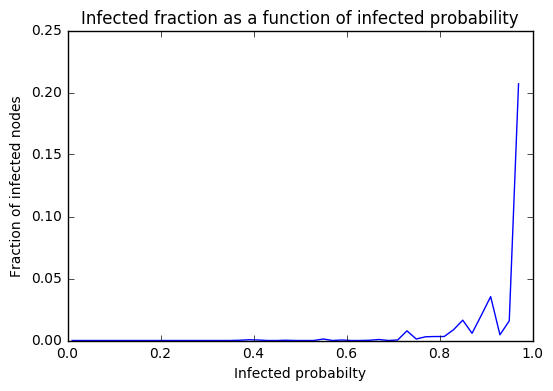

In [10]:
plt.title('Infected fraction as a function of infected probability')
plt.plot(prob, inf_arr)
plt.xlabel('Infected probabilty')
plt.ylabel('Fraction of infected nodes')

In [11]:
def getInfectedFractionAtEachStepModel1(G, numberSteps, thresholdInf, thresholdSusc, startNode):
    inf = []
    susc = []
    inf_arr_fraction, susc_arr_fraction = [], []
    
    #выбираем случайным образом начальную вершину
    cur_infected_node = random.randint(1, nx.number_of_nodes(G))
    
    for i in range(numberSteps):
        
        #заражаем здоровую вершину
        if cur_infected_node not in inf:
            inf.append(cur_infected_node)
        
        #выбираем случайным образом одного неактивного соседа этой вершины
        not_infected_neighbors = []
        for i in list(nx.all_neighbors(G, cur_infected_node)):
            if i not in inf:
                not_infected_neighbors.append(i)
        #если у вершины нет здоровых соседей, завершаем заражение
        if not not_infected_neighbors:
            break
    
        next_infected_node = None
        p = random.uniform(0, 1)
        if p < thresholdInf:
            next_infected_node = random.choice(not_infected_neighbors)
        
        p = random.uniform(0, 1)
        if 1 - p < thresholdSusc:
            inf.remove(cur_infected_node)
            if next_infected_node == None:
                break
            
        if next_infected_node != None:
            cur_infected_node = next_infected_node
            
        inf_arr_fraction.append(len(inf) / nx.number_of_nodes(G))
        susc_arr_fraction.append((nx.number_of_nodes(G) - len(inf)) / nx.number_of_nodes(G))
        
    return inf_arr_fraction, susc_arr_fraction

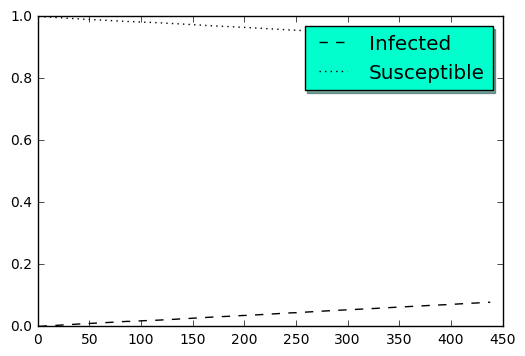

In [20]:
startNode = random.randint(1, nx.number_of_nodes(G))
inf_arr_fraction, susc_arr_fraction = [], []
inf_arr_fraction, susc_arr_fraction = getInfectedFractionAtEachStepModel1(G, 100000, 0.95, 0.05, startNode)
steps = np.arange(1, len(inf_arr_fraction) + 1, 1)

fig, ax = plt.subplots()
ax.plot(steps, inf_arr_fraction, 'k--', label='Infected')
ax.plot(steps, susc_arr_fraction, 'k:', label='Susceptible')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

legend.get_frame().set_facecolor('#00FFCC')

plt.show()

## Model 2

Выбираем случайно вершину i и активируем ее. Далее, итерационно делаем следующее: 
1. Берем ВСЕХ неактивных соседей этой вершины и с вероятностью p (параметр модели) заражаем каждую из них. 
2. Вершина от которой пошло заражение (вершина i) становится здоровой (неактивной)
3. Из зараженных случайно выбираем одну и повторяем шаги 1, 2

In [22]:
inf = []
susc = []
numberSteps = 10
thresholdInf = 0.8
thresholdSusc = 0.1

inf_dict = defaultdict(list)

#выбираем случайным образом начальную вершину
cur_infected_node = random.randint(1, nx.number_of_nodes(G))

for i in range(numberSteps):
    print("Current infected: ", cur_infected_node)
    
    #заражаем здоровую вершину
    if cur_infected_node not in inf:
        inf.append(cur_infected_node)
    print("All infected nodes: ", inf)
    
    #выбираем всех неактивных соседей этой вершины
    not_infected_neighbors = []
    for j in list(nx.all_neighbors(G, cur_infected_node)):
        if j not in inf:
            not_infected_neighbors.append(j)
    print('Соседи, которые могут быть заражены:', not_infected_neighbors)
    
    #если у вершины нет здоровых соседей, завершаем заражение
    if not not_infected_neighbors:
        print("Exit")
        break
        
    if not_infected_neighbors:
        for elem in not_infected_neighbors:
            p = random.uniform(0, 1)
            print(p, elem)
            if p < thresholdInf:
                print('+ 1 заражение')
                inf_dict[i].append(elem)
                print('Добавили след. элемент: ', elem)
    print(inf_dict)         
    
    for key, val in inf_dict.items():
        print('Словарь зараженных: на шаге {0} заражены: {1}'.format(key, val))
        
    #добавим в список зараженных новые вершины
    for j in inf_dict[i]:
        inf.append(j)
    
    if inf_dict[i]:
        inf.remove(cur_infected_node)
        cur_infected_node = random.choice(inf_dict[i])
        
    
    print("-------------------------------")
print("All infected nodes: ", inf)

Current infected:  4546
All infected nodes:  [4546]
Соседи, которые могут быть заражены: [1025, 1026, 5, 10, 1036, 2064, 2065, 3091, 3099, 33, 347, 4132, 42, 44, 46, 47, 4144, 2098, 1075, 854, 4152, 2108, 63, 2113, 4163, 75, 4060, 77, 4178, 83, 4180, 3598, 88, 1113, 4947, 4190, 4191, 98, 1382, 113, 2163, 2164, 124, 2173, 3198, 129, 4229, 444, 2190, 1167, 3216, 3608, 3222, 4248, 1220, 155, 157, 4254, 3232, 1392, 4806, 3241, 170, 4267, 1200, 4273, 2227, 4277, 184, 3615, 1212, 4814, 194, 2244, 374, 3272, 2249, 1226, 1911, 1228, 1229, 206, 4302, 219, 3294, 3295, 226, 4987, 1253, 230, 1917, 235, 3309, 239, 1099, 4339, 2292, 382, 1271, 4138, 1281, 4373, 2309, 2310, 2312, 1068, 2316, 2320, 273, 2606, 3351, 281, 282, 3355, 2332, 4385, 2339, 1318, 4828, 300, 1326, 4920, 4404, 3390, 3393, 323, 325, 2376, 1353, 2378, 1358, 4431, 3408, 3415, 346, 3419, 349, 1374, 351, 1380, 3302, 358, 3440, 1394, 3446, 4471, 1400, 4475, 3454, 385, 387, 391, 2441, 4490, 3467, 3468, 4493, 3116, 3992, 4499, 4787, 450

In [23]:
def getInfectedFractionModel2(G, numberSteps, thresholdInf, startNode):    
    inf = []
    susc = []
    
    inf_dict = defaultdict(list)
    
    cur_infected_node = startNode
    
    for i in range(numberSteps):
        
        #заражаем здоровую вершину
        if cur_infected_node not in inf:
            inf.append(cur_infected_node)
        
        #выбираем всех неактивных соседей этой вершины
        not_infected_neighbors = []
        for j in list(nx.all_neighbors(G, cur_infected_node)):
            if j not in inf:
                not_infected_neighbors.append(j)
    
        #если у вершины нет здоровых соседей, завершаем заражение
        if not not_infected_neighbors:
            print("Exit")
            break
            
        if not_infected_neighbors:
            for elem in not_infected_neighbors:
                p = random.uniform(0, 1)
                if p < thresholdInf:
                    inf_dict[i].append(elem)
        
        #for key, val in inf_dict.items():
        #    print('Словарь зараженных: на шаге {0} заражены: {1}'.format(key, val))
            
        #добавим в список зараженных новые вершины
        for j in inf_dict[i]:
            inf.append(j)
        
        if inf_dict[i]:
            inf.remove(cur_infected_node)
            cur_infected_node = random.choice(inf_dict[i])
            
    print("-----------------------------------")
    print("SIS model")
    print("-----------------------------------")
    print('Initial infected node: ', startNode)
    print('Number of steps: ', numberSteps)
    print('Infected probability: ', thresholdInf)
            
    return inf

In [24]:
startNode = random.randint(1, nx.number_of_nodes(G))
infected = getInfectedFractionModel2(G, 100, 0.89, startNode)
print("Доля зараженных: ", len(infected) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  2979
Number of steps:  100
Infected probability:  0.89
Доля зараженных:  0.9946


In [25]:
startNode = random.randint(1, nx.number_of_nodes(G))
infected = getInfectedFractionModel2(G, 100, 1, startNode)
print(infected)
print("Доля зараженных: ", len(infected) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  569
Number of steps:  100
Infected probability:  1
[1, 2050, 4100, 4101, 3082, 2061, 2064, 21, 1047, 3096, 2073, 1052, 1053, 1056, 3760, 3931, 4877, 2566, 3110, 4785, 4139, 45, 49, 1076, 54, 2106, 1083, 3133, 3139, 3146, 2123, 3151, 3152, 4177, 4180, 2133, 88, 89, 90, 91, 2140, 2143, 1122, 3171, 4129, 4811, 104, 106, 110, 4207, 1136, 4334, 1138, 115, 702, 1145, 123, 2581, 2176, 131, 3205, 1161, 1163, 3212, 4239, 1168, 4244, 3226, 2203, 2416, 1186, 164, 2216, 3245, 2077, 4195, 3261, 3265, 4291, 2246, 199, 1233, 2262, 219, 3297, 3299, 2276, 3301, 4326, 2282, 2284, 3310, 1267, 4990, 4342, 2296, 251, 1276, 2301, 2773, 1283, 260, 1286, 1409, 4361, 1293, 2318, 895, 2321, 275, 1301, 3350, 2328, 4378, 1307, 286, 2949, 4385, 3291, 3366, 4391, 298, 4395, 2158, 3374, 1330, 3380, 3385, 4750, 1343, 1347, 324, 2375, 3400, 1353, 4426, 1356, 3407, 2385, 341, 4438, 1367, 2393, 1372, 4154, 350, 3813

In [26]:
startNode = random.randint(1, nx.number_of_nodes(G))
infected = getInfectedFractionModel2(G, 100, 0, startNode)
print(infected)
print("Доля зараженных: ", len(infected) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  3964
Number of steps:  100
Infected probability:  0
[3964]
Доля зараженных:  0.0002


In [27]:
prob_model2 = np.arange(0.01, 0.99, 0.05)
startNode = random.randint(1, nx.number_of_nodes(G))
inf_arr_model2 = []
for p in prob_model2:
    infected_arr = getInfectedFractionModel2(G, 100, p, startNode)
    inf_arr_model2.append(len(infected_arr) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  680
Number of steps:  100
Infected probability:  0.01
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  680
Number of steps:  100
Infected probability:  0.06
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  680
Number of steps:  100
Infected probability:  0.11
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  680
Number of steps:  100
Infected probability:  0.16
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  680
Number of steps:  100
Infected probability:  0.21
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  680
Number of steps:  100
Infected probability:  0.26
-----------------------------------
SIS 

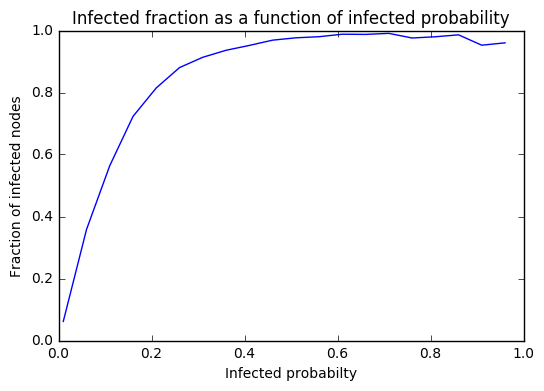

In [28]:
plt.title('Infected fraction as a function of infected probability')
plt.plot(prob_model2, inf_arr_model2)
plt.xlabel('Infected probabilty')
plt.ylabel('Fraction of infected nodes')

##### Интересно, зависит ли заражение от источника заражения?

In [50]:
start_nodes = np.arange(1, 100, 1)
inf_arr_model2 = []
for startNode in start_nodes:
    infected_arr = getInfectedFractionModel2(G, 100, 0.5, startNode)
    inf_arr_model2.append(len(infected_arr) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  1
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  2
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  3
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  4
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  5
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  6
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
------------

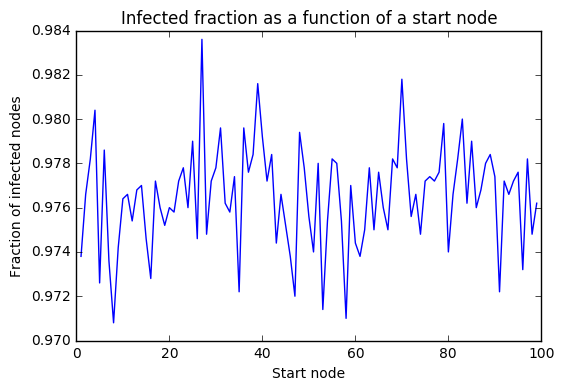

In [51]:
plt.title('Infected fraction as a function of a start node')
plt.plot(start_nodes, inf_arr_model2)
plt.xlabel('Start node')
plt.ylabel('Fraction of infected nodes')

##### Вывод: в модели 2 зависимости от стартовой вершины заражения не выявлено

In [29]:
def getInfectedFractionAtEachStepModel2(G, numberSteps, thresholdInf, startNode):    
    inf = []
    susc = []
    infected_fraction = []
    susc_fraction = []
    
    inf_dict = defaultdict(list)
    
    cur_infected_node = startNode
    
    for i in range(numberSteps):
        
        #заражаем здоровую вершину
        if cur_infected_node not in inf:
            inf.append(cur_infected_node)
        
        #выбираем всех неактивных соседей этой вершины
        not_infected_neighbors = []
        for j in list(nx.all_neighbors(G, cur_infected_node)):
            if j not in inf:
                not_infected_neighbors.append(j)
    
        #если у вершины нет здоровых соседей, завершаем заражение
        if not not_infected_neighbors:
            print("Exit")
            break
            
        if not_infected_neighbors:
            for elem in not_infected_neighbors:
                p = random.uniform(0, 1)
                if p < thresholdInf:
                    inf_dict[i].append(elem)
            
        #добавим в список зараженных новые вершины
        for j in inf_dict[i]:
            inf.append(j)
        
        if inf_dict[i]:
            inf.remove(cur_infected_node)
            cur_infected_node = random.choice(inf_dict[i])
            
        infected_fraction.append(len(inf) / nx.number_of_nodes(G))
        susc_fraction.append((nx.number_of_nodes(G) - len(inf)) / nx.number_of_nodes(G))
            
    print("-----------------------------------")
    print("SIS model")
    print("-----------------------------------")
    print('Initial infected node: ', startNode)
    print('Number of steps: ', numberSteps)
    print('Infected probability: ', thresholdInf)
             
    return infected_fraction, susc_fraction

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  1761
Number of steps:  1000
Infected probability:  0.2


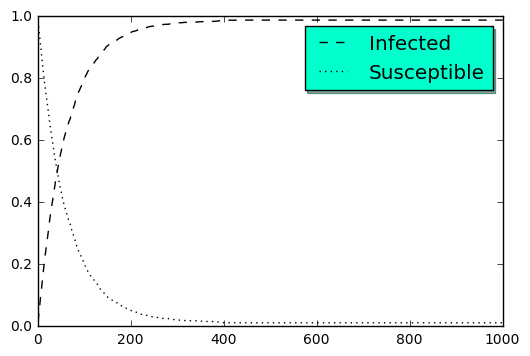

In [31]:
steps = np.arange(1, 1001, 1)
startNode = random.randint(1, nx.number_of_nodes(G))
inf_arr_fraction, susc_arr_fraction = [], []
inf_arr_fraction, susc_arr_fraction = getInfectedFractionAtEachStepModel2(G, 1000, 0.2, startNode)

fig, ax = plt.subplots()
ax.plot(steps, inf_arr_fraction, 'k--', label='Infected')
ax.plot(steps, susc_arr_fraction, 'k:', label='Susceptible')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

legend.get_frame().set_facecolor('#00FFCC')

plt.show()